# PRODIGY TASK-2

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#IMPORTING THE DATASET
cs=pd.read_csv("Mall_Customers.csv")

In [3]:
cs

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
cs.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
features=["Annual Income (k$)","Spending Score (1-100)"]

In [6]:
cs=cs.dropna(subset=features)

In [7]:
data=cs[features].copy()

In [8]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
data.shape

(200, 2)

In [10]:
# STEPS TO IMPLEMENT K-MEANS METHOD
# 1. Scale the data
# 2. Initialize random centroids
# 3.Label each data point
# 4. Update centroids
# 5. Repeat steps 3 and 4 until centroids stop changing

DATA VISUALIZATION

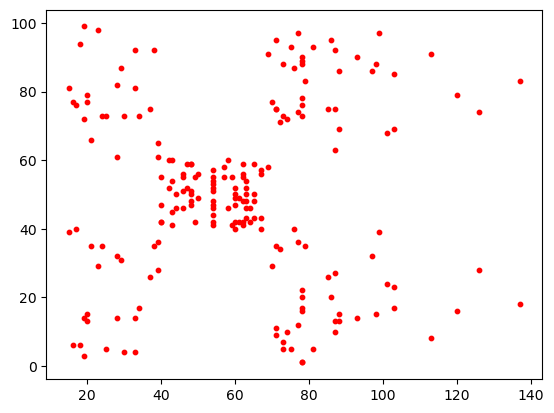

In [11]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], s=10, c="red")

In [12]:
from sklearn.cluster import KMeans

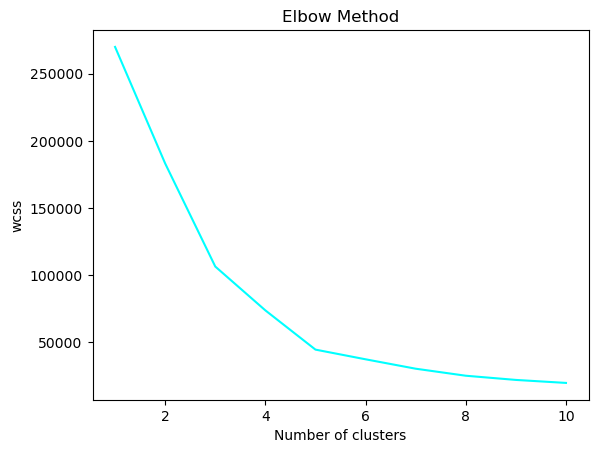

In [13]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init = "k-means++", max_iter=300, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, color='cyan')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10)
labels=kmeans.fit_predict(data)

In [15]:
np.unique(labels)

array([0, 1, 2, 3, 4])

In [16]:
centroid_points = kmeans.cluster_centers_
print("Centroid points:")
print(centroid_points)

Centroid points:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


# CLUSTERING RESULT

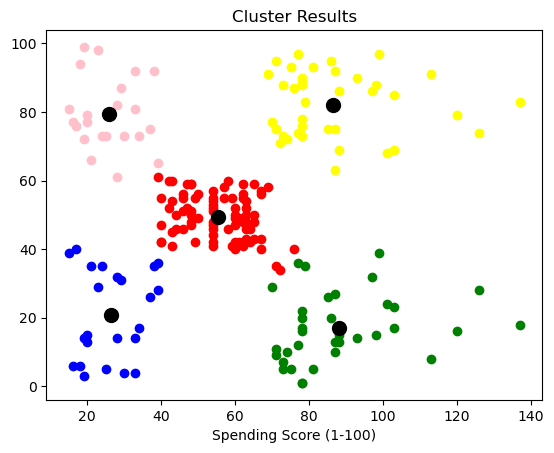

In [17]:
plt.scatter(data.iloc[labels==0,0], data.iloc[labels==0,1], c="red", label="Cluster 1")
plt.scatter(data.iloc[labels==1,0], data.iloc[labels==1,1], c="yellow", label="Cluster 2")
plt.scatter(data.iloc[labels==2,0], data.iloc[labels==2,1], c="pink", label="Cluster 3")
plt.scatter(data.iloc[labels==3,0], data.iloc[labels==3,1], c="green", label="Cluster 4")
plt.scatter(data.iloc[labels==4,0], data.iloc[labels==4,1], c="blue", label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="black", label="Centroids")
plt.title("Cluster Results")
plt.xlabel("Annual Income (k$)")
plt.xlabel("Spending Score (1-100)")
plt.show()